# CS 422 Section 01
<p>Department of Computer Science</p>
<p>Illinois Institute of Technology</p>
<p>Jithin Joyson</p>
<p>Spring 2019: Homework 3</p>

## Part 2.3

In [16]:
library(cluster)
library(factoextra)

In [17]:
HTRU <- read.csv("HTRU_2-small.csv", sep = ",", header = T)
head(HTRU)

mean,std.dev,kurtosis,skewness,mean.dm.snr,std.dev.dm.snr,kurtosis.dm.snr,skewness.dm.snr,class
45.60938,39.13683,3.646904656,13.7728696,127.943144,72.76457,0.06791464,-0.826413,1
121.75781,44.74943,0.231819049,0.1846086,3.760870,22.86933,6.71857507,47.952567,0
112.97656,48.84741,0.272892611,0.2677589,94.927258,83.71522,-0.21163662,-1.861892,0
130.07031,51.38719,-0.160128253,-0.2094694,2.025084,13.17014,10.01610903,138.328787,0
111.11719,35.63500,0.237672636,1.6792307,3.688127,18.68339,6.66335683,54.090504,0
138.46094,52.77457,-0.009090614,-0.5518453,2.220736,13.20426,9.95369210,139.466872,0


In [18]:
X <- HTRU[1:8]
head(X)

mean,std.dev,kurtosis,skewness,mean.dm.snr,std.dev.dm.snr,kurtosis.dm.snr,skewness.dm.snr
45.60938,39.13683,3.646904656,13.7728696,127.943144,72.76457,0.06791464,-0.826413
121.75781,44.74943,0.231819049,0.1846086,3.760870,22.86933,6.71857507,47.952567
112.97656,48.84741,0.272892611,0.2677589,94.927258,83.71522,-0.21163662,-1.861892
130.07031,51.38719,-0.160128253,-0.2094694,2.025084,13.17014,10.01610903,138.328787
111.11719,35.63500,0.237672636,1.6792307,3.688127,18.68339,6.66335683,54.090504
138.46094,52.77457,-0.009090614,-0.5518453,2.220736,13.20426,9.95369210,139.466872


### Part 2.3-A

In [19]:
pca <- prcomp(scale(X))

#### Part 2.3-A-I

In [20]:
var <- pca$sdev^2
var_tot <- sum(var)
varPC.1.2 <- var[1] + var[2]
varPC.1.2/var_tot

[1] 0.7854804

78.54% of the variance is explained by PC1 and PC2

#### Part 2.3-A-II

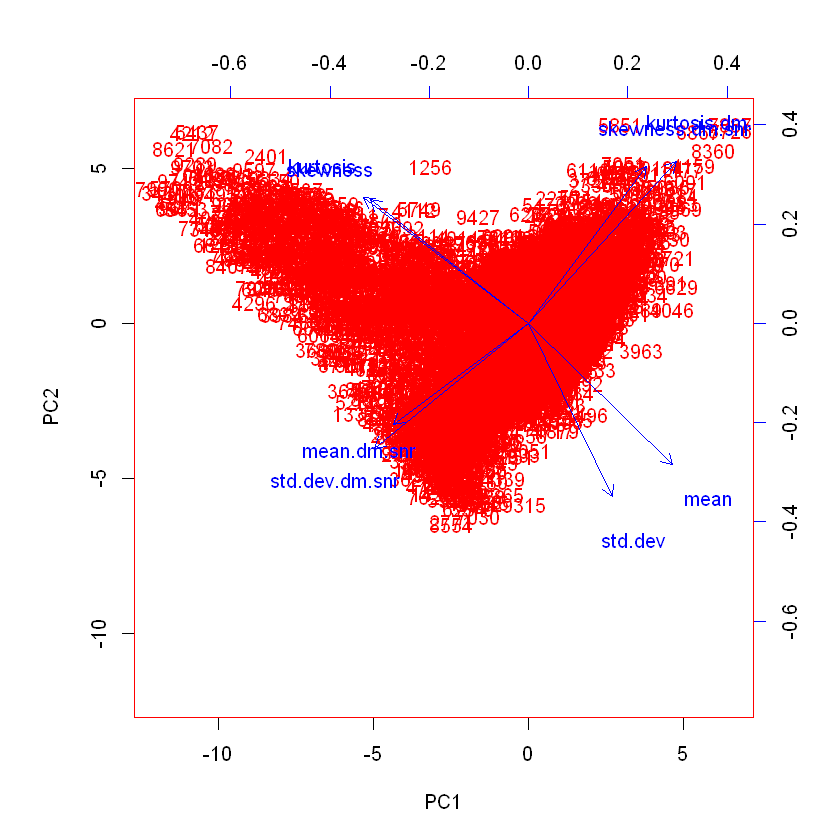

In [21]:
biplot(pca, scale=0, col = c("red","blue"))

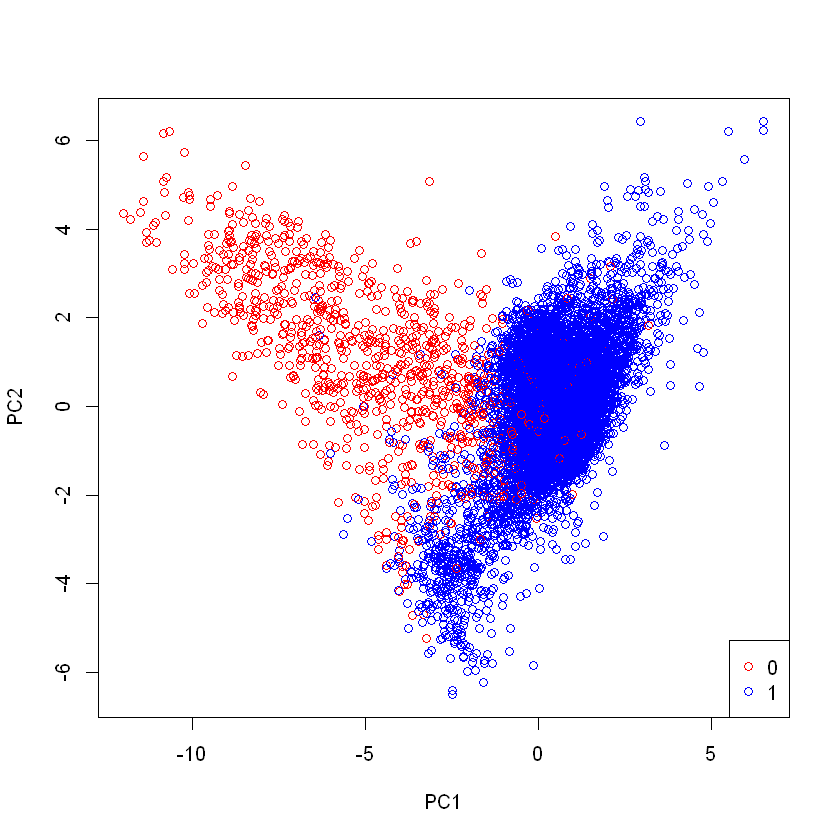

In [22]:
plot(x=pca$x[,'PC1'], y=pca$x[,'PC2'], xlab='PC1', ylab='PC2', col = c('blue','red')[as.factor(HTRU$class)])
legend(x="bottomright", legend = levels(as.factor(HTRU$class)), col=c("red","blue"), pch=1)

#### Part 2.3-A-III

Looking at both plots, it seems clear that the data is divided into classes (0 to the left and 1 to the right).

### Part 2.3-B

#### Part 2.3-B-I

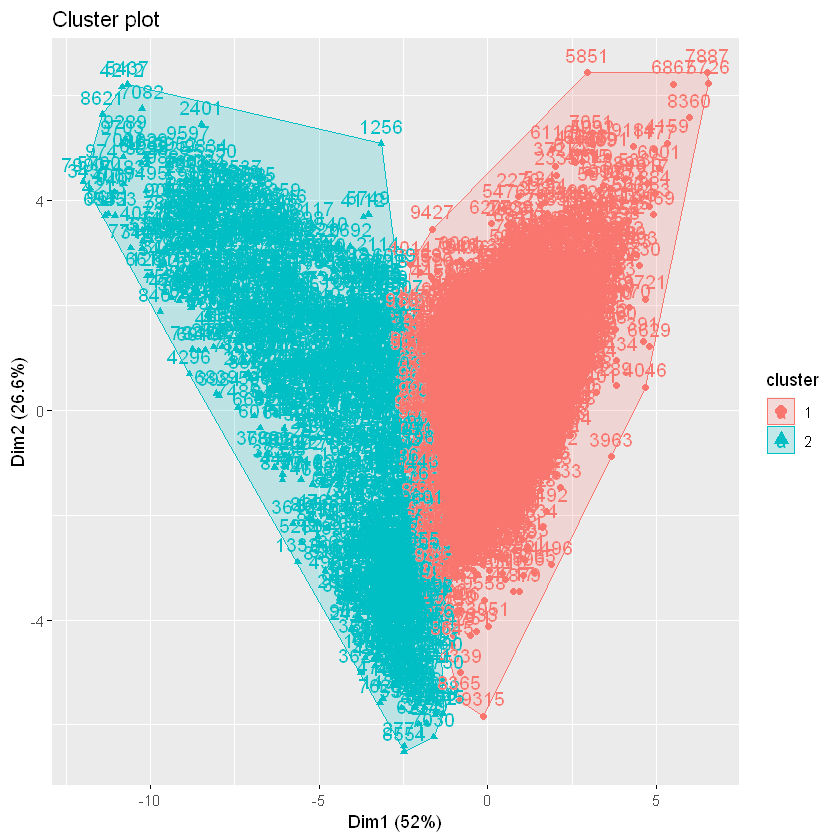

In [23]:
k <- kmeans(scale(X), centers=2, nstart=25)
fviz_cluster(k, data = scale(X))

#### Part 2.3-B-II

The shape of the graphs in a.ii and b.i are similiar with different ranges for x and y. The points in the clusters are in same positions as the pca (class labeled) plots.

Furthermore, the clusters created in b.i mimic the seperate labels in a.ii. The points in the bottom clustered differently relativing to class labels in the PCA plot.

#### Part 2.3-B-III

In [24]:
k$size

[1] 8847 1153

There are 8847 observations in cluster 1 and 1153 observations in cluster 2

#### Part 2.3-B-IV

In [25]:
nrow(HTRU[HTRU$class > 0,])

[1] 959

In [26]:
nrow(HTRU[HTRU$class < 1,])

[1] 9041

There are 9041 observations for class 0 and 959 observations for class 1

#### Part 2.3-B-V

Cluster 1 holds the majority class of class = 0 and Cluster 2 holds the minority class of class = 1

#### Part 2.3-B-VI

In [27]:
cluster1 <- HTRU[which(k$cluster == 1),]
nrow(cluster1[cluster1$class > 0,])
nrow(cluster1[cluster1$class < 1,])

[1] 223

[1] 8624

The majority cluster holds 223 class = 1 observations and 8624 class = 0 observations

#### Part 2.3-B-VII

Still the majority cluster holds more class = 0 obeservations so this cluster has to be class = 0

#### Part 2.3-B-VIII

In [28]:
k$betweenss/k$totss

[1] 0.3586788

35.87 % of the varriance is explained by clustering

#### Part 2.3-B-IX

In [29]:
s <- silhouette(k$cluster, dist(scale(X)))
mean(s[,'sil_width'])

[1] 0.6006794

#### Part 2.3-B-X

In [30]:
mean(s[,'sil_width'][which(k$cluster == 1)])

[1] 0.6592013

In [31]:
mean(s[,'sil_width'][which(k$cluster == 2)])

[1] 0.1516389

The Silhouette width of cluster 1 is .65920 and the Silhouette width of cluster 2 is .1516

Since the Silhouette width is being maximized to provide better clusters, cluster 1 is good relative to Silhouette width.

### Part 2.3-C

In [32]:
k <- kmeans(pca$x[, 1:2], centers=2, nstart=25)

#### Part 2.3-C-I

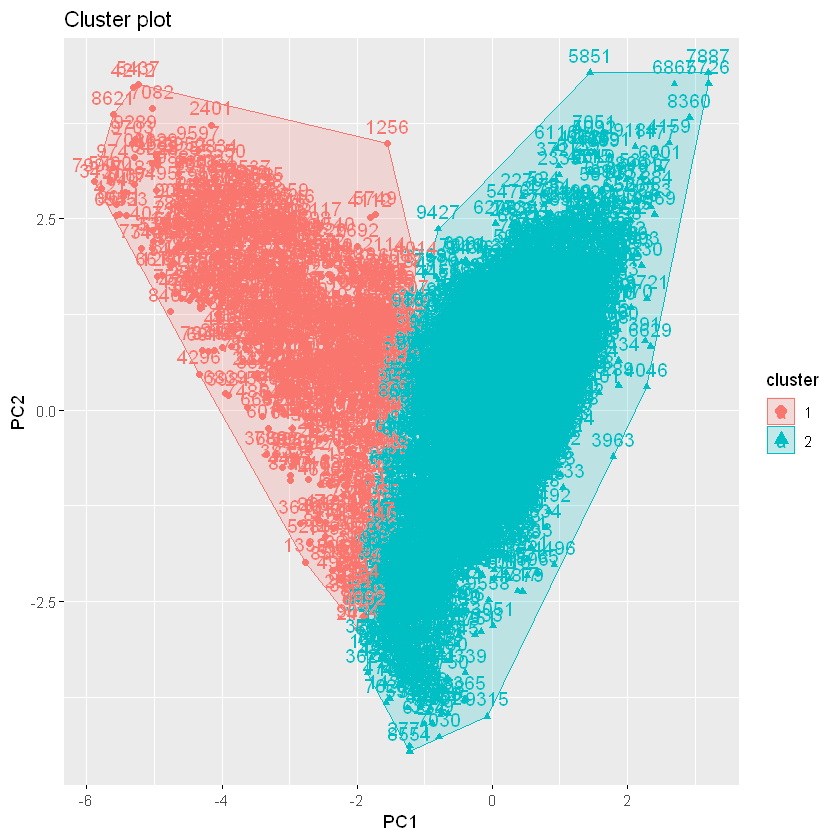

In [33]:
fviz_cluster(k, data = pca$x[, 1:2])

Once again, the shape of the overall graph are the same with different ranges on the axises. 

The differences are the clustering vs b.ii were cluster 1 have more points and spreading a little more to the left. This plot is a better representation of the plot in a.i since cluster 1 holds more of label = 1 points. There is an overestimation but looks more precise of capturing the labels than the b.ii plot.

#### Part 2.3-C-II

In [34]:
s <- silhouette(k$cluster, dist(pca$x[, 1:2]))
mean(s[,'sil_width'])

[1] 0.6826261

#### Part 2.3-C-III

In [35]:
mean(s[,'sil_width'][which(k$cluster == 1)])

[1] 0.4489076

In [36]:
mean(s[,'sil_width'][which(k$cluster == 2)])

[1] 0.7003259

The Silhouette width of cluster 1 is 0.7003 and the Silhouette width of cluster 2 is 0.4489

Since the Silhouette width is being maximized to provide better clusters, cluster 1 is good relative to Silhouette width.

#### Part 2.3-C-VI

These values seems to replicate what happened in the plots. Silhouette width Cluster 1 and Cluster 2 for b.x vs c.iii are higher in c.iii. Since we are trying to maximize Silhouette widths, c.iii are producing better clusters for 1 and 2